In [4]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

df = pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Bureau\\sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [6]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
df.duplicated().sum()

0

In [8]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


In [9]:
#Data Processing 
df=df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [10]:
df['Platform'].value_counts()

 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: Platform, dtype: int64

In [11]:
#remove any leading and trailing whitespace characters from the strings
df['Platform'] = df['Platform'].str.strip()

In [12]:
df['Country'].value_counts()

 USA               59
 USA               55
 UK                49
 Canada            44
 Australia         41
                   ..
 Netherlands        1
 USA                1
 Germany            1
 France             1
 USA                1
Name: Country, Length: 115, dtype: int64

In [13]:
df['Country'] = df['Country'].str.strip()

In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day_of_Week'] = df['Timestamp'].dt.day_name()

In [15]:
month = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df['Month'] = df['Month'].map(month)
df['Month'] = df['Month'].astype('object')


In [16]:
#nettoyage de text


df_test = df.copy()

def categorize_sentiment(sentiment):
    positive_sentiments = ['Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Awe',
                           'Surprise', 'Acceptance', 'Adoration', 'Anticipation', 'Calmness', 'Excitement',
                           'Kind', 'Pride', 'Shame', 'Elation', 'Euphoria', 'Contentment', 'Serenity', 'Gratitude',
                           'Hope', 'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm',
                           'Fulfillment', 'Reverence', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate',
                           'Playful', 'Free-spirited', 'Inspired', 'Confident']
    negative_sentiments = ['Anger', 'Fear', 'Sadness', 'Disgust', 'Bitter', 'Confusion', 'Despair', 'Grief',
                           'Loneliness', 'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety',
                           'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Hate', 'Bad', 'Fearful',
                           'Apprehensive', 'Overwhelmed', 'Jealous', 'Devastated', 'Frustrated', 'Envious',
                           'Dismissive', 'Nervous', 'Worried', 'Tense', 'Stressed', 'Depressed', 'Miserable',
                           'Lonely', 'Insecure', 'Guilty', 'Embarrassed', 'Mischievous', 'Sad']
    if sentiment.strip() in positive_sentiments:
        return 'Positive'
    elif sentiment.strip() in negative_sentiments:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment categorization function to the 'Sentiment' column
df_test['Sentiment_Category'] = df_test['Sentiment'].apply(categorize_sentiment)

# Create columns to indicate if the sentiment is positive, negative, or neutral
df_test['Positive'] = df_test['Sentiment_Category'] == 'Positive'
df_test['Negative'] = df_test['Sentiment_Category'] == 'Negative'
df_test['Neutral'] = df_test['Sentiment_Category'] == 'Neutral'

df_test.head()


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Day_of_Week,Sentiment_Category,Positive,Negative,Neutral
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,January,15,12,Sunday,Neutral,False,False,True
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,January,15,8,Sunday,Neutral,False,False,True
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,January,15,15,Sunday,Neutral,False,False,True
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,January,15,18,Sunday,Neutral,False,False,True
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,January,15,19,Sunday,Neutral,False,False,True


In [17]:
import re
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')


# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

# Assuming 'df' is your DataFrame and 'Text' is the column containing the text data
df["Clean_Text"] = df["Text"].apply(clean)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
from colorama import Fore

colonne_special= ['Platform','Country', 'Year','Month','Day']

for col in colonne_special:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n') 

Total unique values for Platform: 3
Instagram: 258
Twitter: 243
Facebook: 231


Total unique values for Country: 33
USA: 188
UK: 143
Canada: 135
Australia: 75
India: 70
Brazil: 17
France: 16
Japan: 15
Germany: 14
Italy: 11
Spain: 6
South Africa: 6
Greece: 5
Netherlands: 4
Switzerland: 3
Portugal: 2
Austria: 2
Belgium: 2
Denmark: 2
Czech Republic: 2
Sweden: 2
Colombia: 1
Scotland: 1
Kenya: 1
Jamaica: 1
Ireland: 1
China: 1
Norway: 1
Cambodia: 1
Maldives: 1
Peru: 1
Jordan: 1
Thailand: 1


Total unique values for Year: 14
2023: 289
2019: 73
2020: 69
2021: 63
2022: 63
2018: 56
2017: 43
2016: 38
2015: 19
2011: 4
2012: 4
2013: 4
2014: 4
2010: 3


Total unique values for Month: 12
February: 85
January: 82
August: 78
September: 77
June: 71
July: 62
April: 51
November: 49
October: 48
May: 46
March: 44
December: 39


Total unique values for Day: 31
15: 73
10: 63
28: 59
18: 49
5: 48
20: 39
22: 39
12: 38
8: 34
2: 27
1: 26
30: 23
25: 23
3: 21
17: 17
19: 14
14: 13
27: 12
11: 11
24: 11
16: 11
29: 11
7

In [2]:
pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
#Sentiment Analysis

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df_sentiment = df.copy()
analyzer = SentimentIntensityAnalyzer()

df['Vader_Score'] = df['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df[['Clean_Text', 'Vader_Score', 'Sentiment']].head())

                     Clean_Text  Vader_Score Sentiment
0         enjoy beauti day park       0.4939  positive
1          traffic terribl morn       0.0000   neutral
2           finish amaz workout       0.0000   neutral
3   excit upcom weekend getaway       0.0000   neutral
4  tri new recip dinner tonight       0.0000   neutral


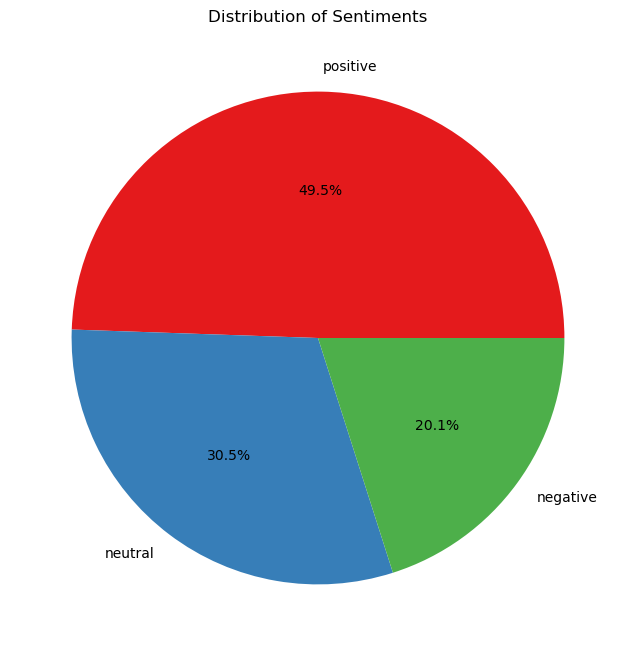

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette('Set1', n_colors=len(df_sentiment['Sentiment'].unique()))
sentiment_counts = df_sentiment['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=palette)
plt.title('Distribution of Sentiments')
plt.show()

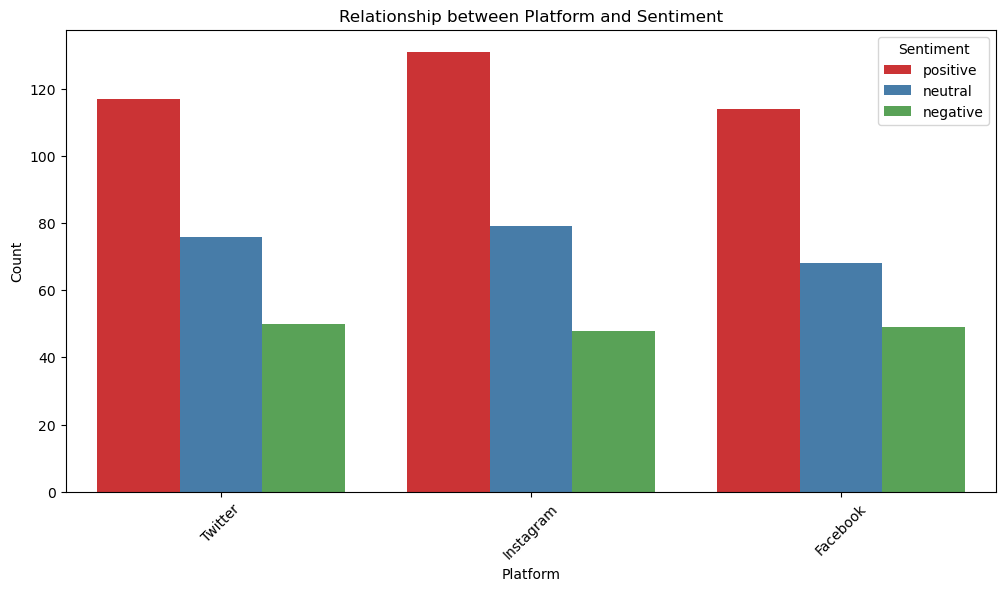

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df, palette=palette)
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

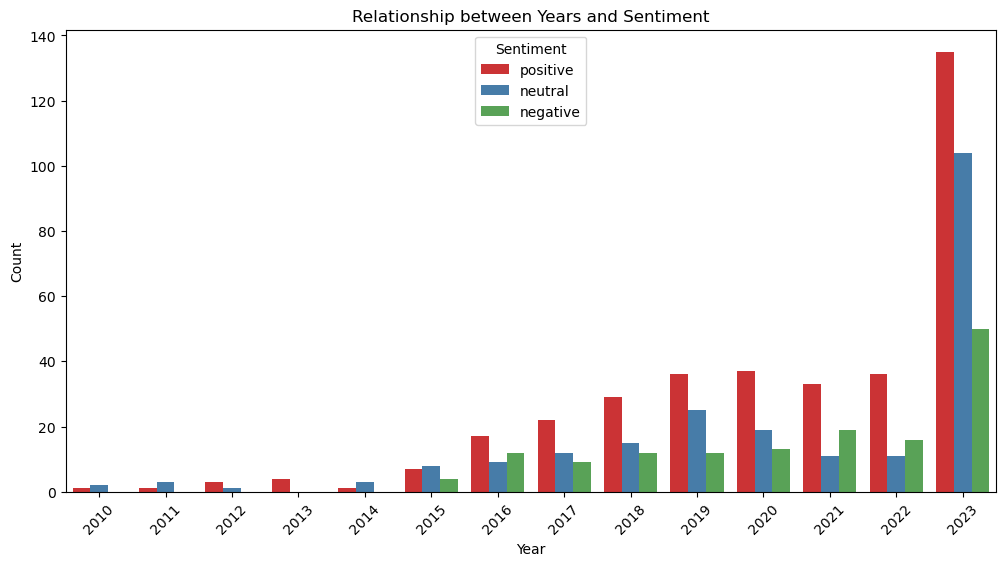

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=df, palette=palette)
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

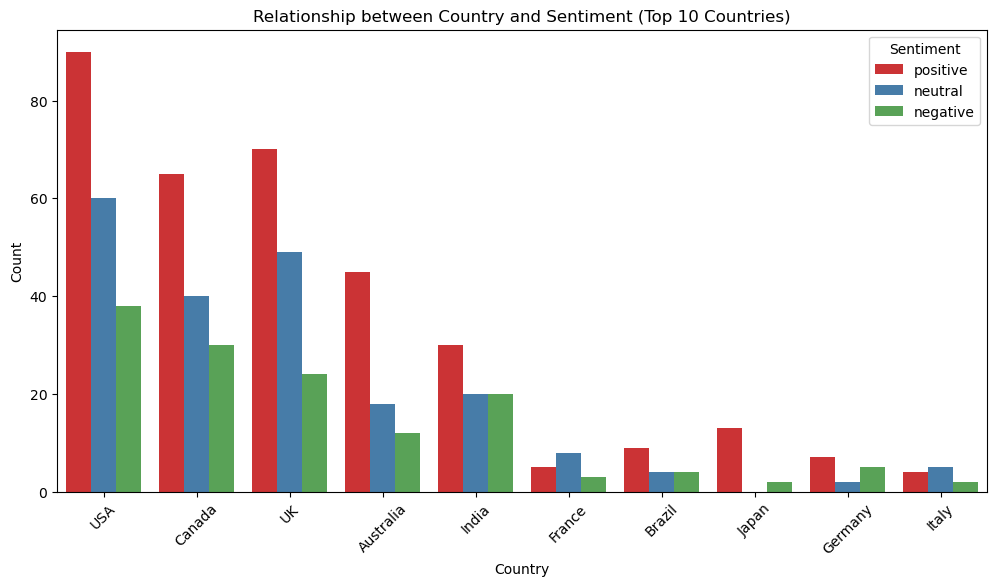

In [33]:
plt.figure(figsize=(12, 6))

top_10_countries = df['Country'].value_counts().head(10).index

df_top_10_countries = df[df['Country'].isin(top_10_countries)]

sns.countplot(x='Country', hue='Sentiment', data=df_top_10_countries, palette=palette)
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [35]:
from collections import Counter

df['temp_list'] = df['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,new,43
1,life,37
2,challeng,34
3,joy,31
4,danc,30
5,day,29
6,feel,29
7,like,28
8,dream,28
9,moment,27


In [44]:
#Positive word
top = Counter([item for sublist in df[df['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')

,Common_words,count
0,joy,30
1,friend,24
2,laughter,24
3,heart,24
4,dream,22
5,new,21
6,like,21
7,challeng,20
8,life,20
9,hope,20


In [39]:
#Negative
top = Counter([item for sublist in df[df['Sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

,Common_words,count
0,despair,14
1,lost,14
2,emot,13
3,feel,11
4,day,9
5,bitter,9
6,storm,9
7,grief,8
8,overwhelm,7
9,numb,7


In [45]:
#Neutral
top = Counter([item for sublist in df[df['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,new,22
1,explor,13
2,excit,12
3,life,12
4,beauti,12
5,danc,12
6,attend,11
7,feel,10
8,night,10
9,seren,10


Accuracy: 0.60
              precision    recall  f1-score   support

    negative       0.94      0.32      0.48        47
     neutral       0.70      0.32      0.43        73
    positive       0.56      0.95      0.70       100

    accuracy                           0.60       220
   macro avg       0.73      0.53      0.54       220
weighted avg       0.68      0.60      0.56       220

['positive' 'positive']


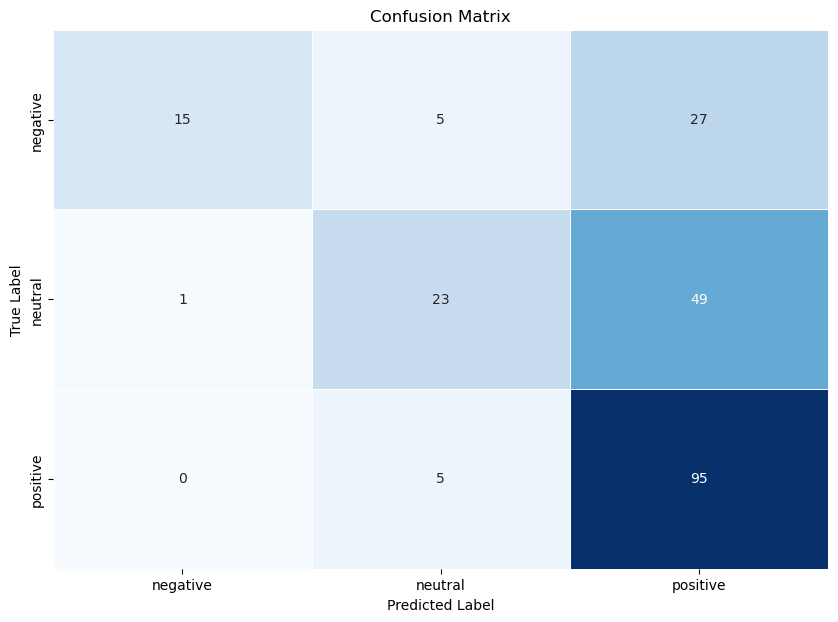

In [53]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


df['Clean_Text'] = df['Clean_Text'].astype(str)


X = df['Clean_Text']  
y = df['Sentiment']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic regression 
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

new_text = ["I love this product!", "This is the worst service ever."]
new_text_tfidf = vectorizer.transform(new_text)
predictions = model.predict(new_text_tfidf)
print(predictions)

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [49]:

from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

# Print accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))
new_text = ["I love this product!", "This is the worst service ever."]
new_text_tfidf = vectorizer.transform(new_text)
predictions = model.predict(new_text_tfidf)
print(predictions)

Accuracy: 0.69
              precision    recall  f1-score   support

    negative       0.79      0.70      0.74        47
     neutral       0.63      0.51      0.56        73
    positive       0.68      0.81      0.74       100

    accuracy                           0.69       220
   macro avg       0.70      0.67      0.68       220
weighted avg       0.69      0.69      0.68       220

['positive' 'positive']


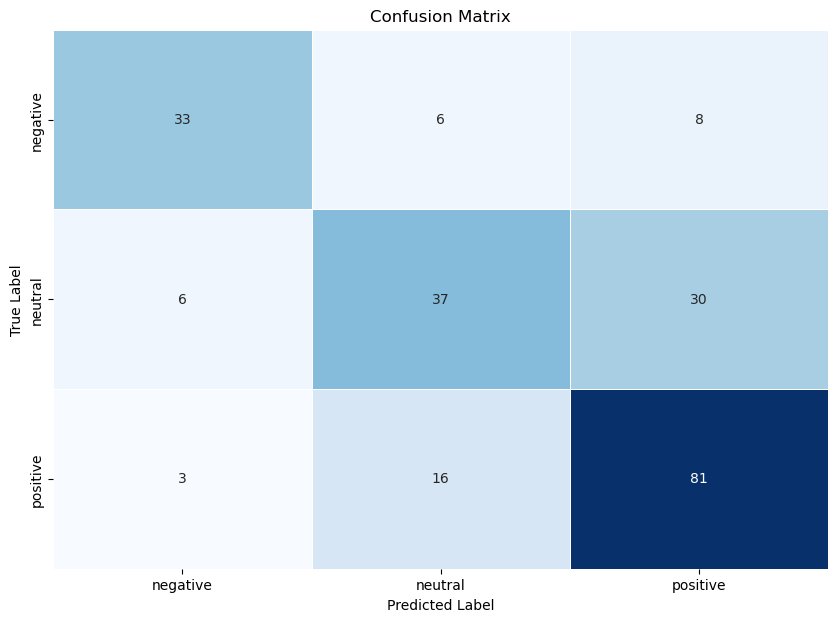

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.66
              precision    recall  f1-score   support

    negative       0.84      0.66      0.74        47
     neutral       0.59      0.41      0.48        73
    positive       0.64      0.84      0.72       100

    accuracy                           0.66       220
   macro avg       0.69      0.64      0.65       220
weighted avg       0.66      0.66      0.65       220



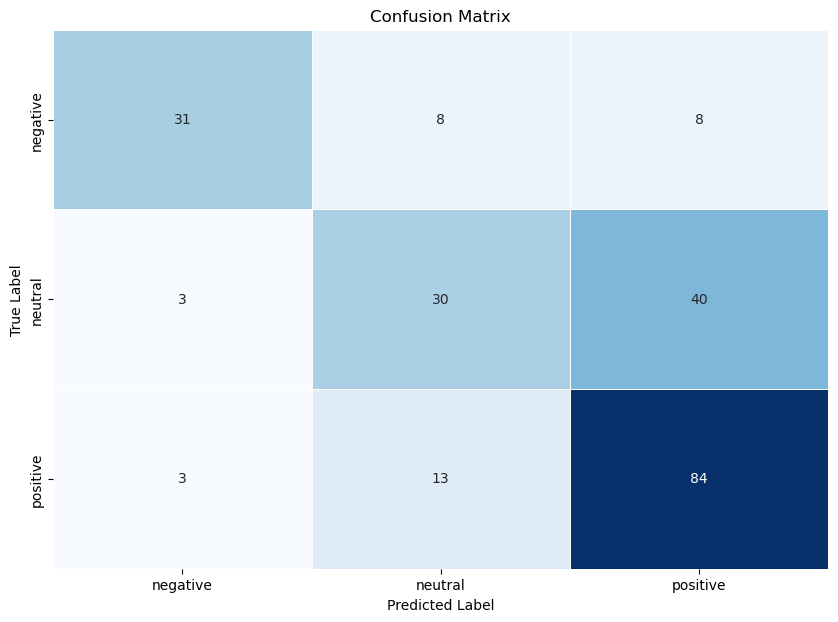

In [54]:
#SVM CLASSIFIER 

from sklearn.svm import SVC

svm_model = SVC(kernel='linear')  

svm_model.fit(X_train_tfidf, y_train)
y_pred = svm_model.predict(X_test_tfidf)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
cm_df = pd.DataFrame(cm, index=svm_model.classes_, columns=svm_model.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()